# CNN for Image Processing

## Imports

In [20]:
import tensorflow as tf

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

## Data Preprocessing

In [1]:
# importing dataset 
from tensorflow.keras.datasets import cifar10

In [9]:
# loading dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 410s 2us/step


In [21]:
class_name = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]
for i in range(0, len(class_name)):
    class_name[i] = f"{i}: {class_name[i]}"

In [22]:
class_name

['0: airplane',
 '1: automobile',
 '2: bird',
 '3: cat',
 '4: deer',
 '5: dog',
 '6: frog',
 '7: horse',
 '8: ship',
 '9: truck']

In [23]:
x_train.min(), x_train.max(), x_train.mean()

(0, 255, 120.70756512369792)

In [24]:
y_train.min(), y_train.max(), y_train.mean()

(0, 9, 4.5)

In [25]:
x_train[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

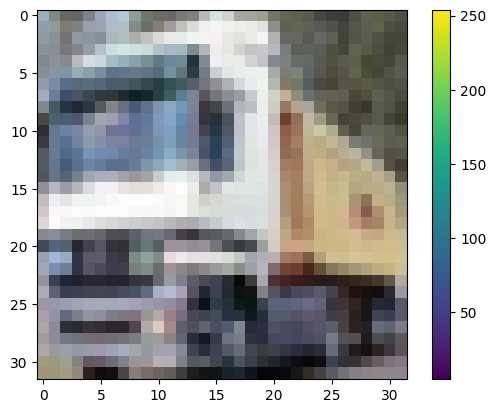

In [26]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [28]:
class_name[y_train[1][0]]

'9: truck'

In [29]:
# normalizing the images

x_train = x_train / 255.0
x_test = x_test / 255.0

In [30]:
x_train.min(), x_train.max(), x_train.mean()

(0.0, 1.0, 0.4733630004850874)

In [32]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))